## Imports

In [2]:
import sys
import os
import pickle

library_path = os.path.join('..', '..', '..','UCB-USACE-LSTMs')
sys.path.insert(0, library_path)

from pathlib import Path
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
import torch
from neuralhydrology.evaluation.metrics import *
from neuralhydrology.nh_run import start_run, eval_run, finetune
from neuralhydrology.utils.nh_results_ensemble import create_results_ensemble
from neuralhydrology.UCB_training.UCB_train import UCB_trainer
from neuralhydrology.UCB_training.UCB_train import clean_daily
from neuralhydrology.UCB_training.UCB_train import combinedPlot
from neuralhydrology.evaluation.metrics import calculate_all_metrics

## Working directory

In [4]:
print("Current Working Directory:", os.getcwd())
print("Train Basin File Exists:", os.path.exists("hopland"))

Current Working Directory: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all
Train Basin File Exists: True


## Standard daily LSTM, train on training subset, evaluate on evaluation period (for hyperparameter search)

In [6]:
path_to_csv = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/")
path_to_yaml = Path("hopland_gage.yaml")
params = {
    "epochs":5,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
#defaults to daily so no need to specify hourly
lstmNoPhysicsDaily = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params)

In [7]:
lstmNoPhysicsDaily.train()

2025-01-16 13:23:37,514: Logging to F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1601_132337\output.log initialized.
2025-01-16 13:23:37,516: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1601_132337
2025-01-16 13:23:37,517: ### Run configurations for testing_run
2025-01-16 13:23:37,519: experiment_name: testing_run
2025-01-16 13:23:37,519: train_basin_file: hopland
2025-01-16 13:23:37,521: validation_basin_file: hopland
2025-01-16 13:23:37,522: test_basin_file: hopland
2025-01-16 13:23:37,524: train_start_date: 1994-10-01 00:00:00
2025-01-16 13:23:37,525: train_end_date: 2002-09-30 00:00:00
2025-01-16 13:23:37,526: validation_start_date: 2002-10-01 00:00:00
2025-01-16 13:23:37,528: validation_end_date: 2005-09-30 00:00:00
2025-01-16 13:23:37,530: test_start_date: 2005-10-01 00:00:00
2025-01-16 13:23:37,532: test_end_date: 2009-09-29 00:00:00
2025-01-16 13:23:37,534: device: cpu
2025-01-16 13:23:37,536: phys

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.mod

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]
2025-01-16 13:23:50,318: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1601_132337\validation\model_epoch005\validation_metrics.csv
2025-01-16 13:23:50,321: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1601_132337\validation\model_epoch005\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/hopland_all/runs/testing_run_1601_132337')

Using basin: Hopland
Using target variable: NR HOPLAND FLOW COE HOP
Observed_key: NR HOPLAND FLOW COE HOP_obs
Simulated_key: NR HOPLAND FLOW COE HOP_sim


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead

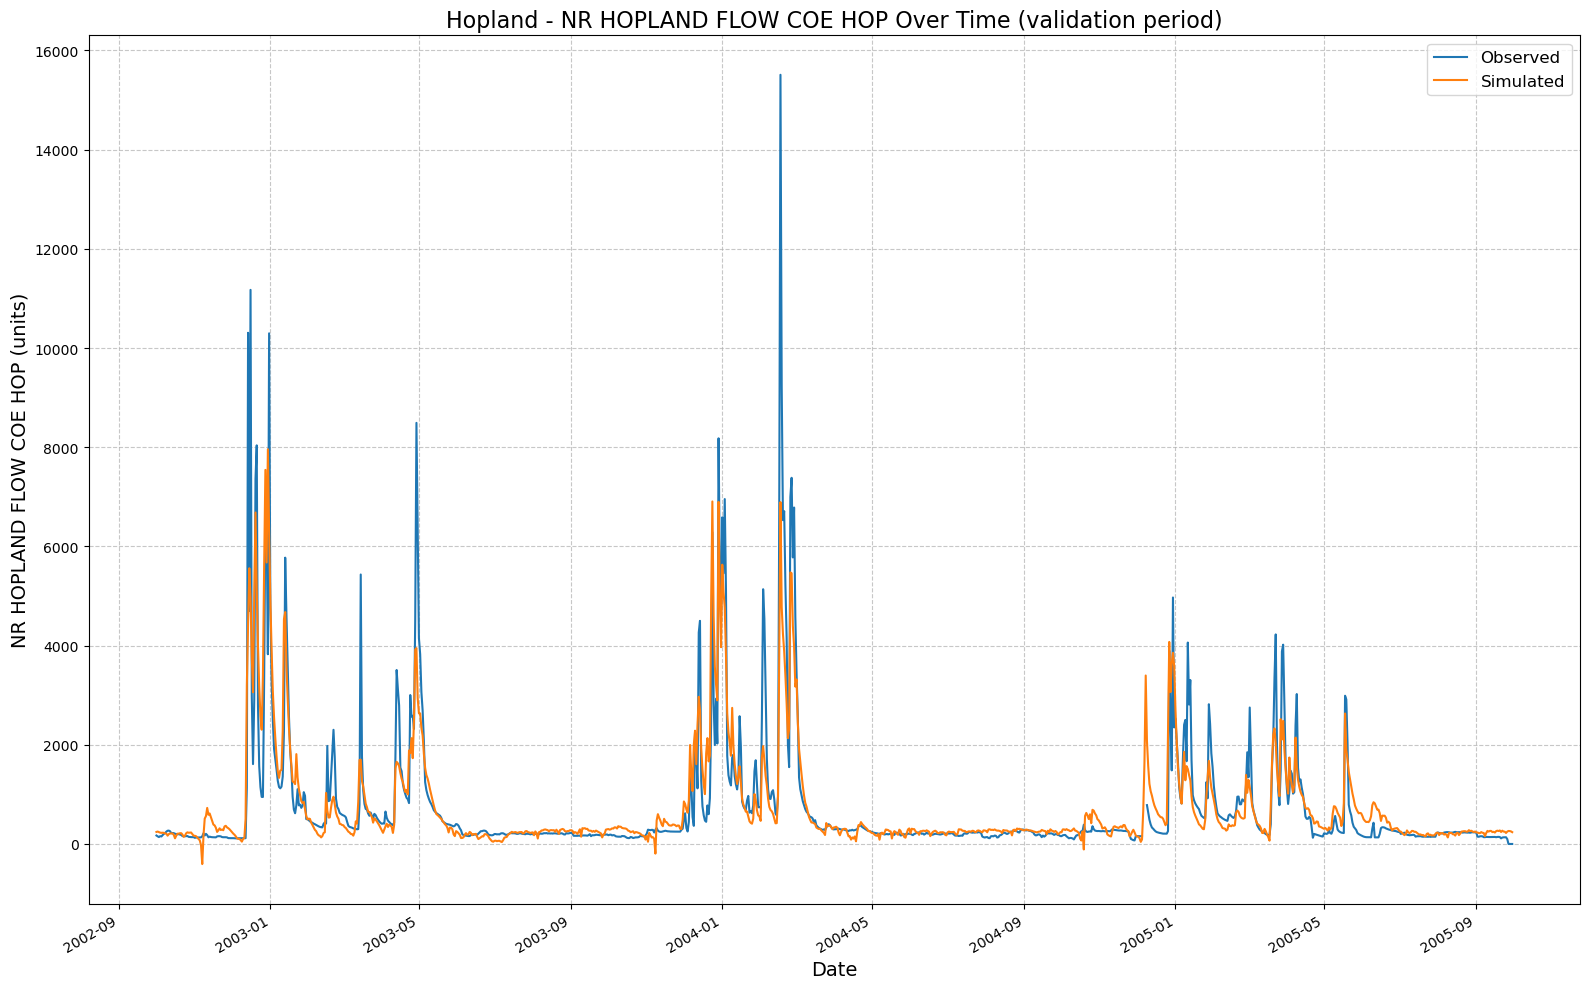

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1601_132337\results_output_validation.csv


({'NSE': 0.7542451173067093,
  'MSE': 472410.65625,
  'RMSE': 687.3213631555475,
  'KGE': 0.7331201053363168,
  'Alpha-NSE': 0.7658047892228136,
  'Beta-KGE': 0.970272958278656,
  'Beta-NSE': -0.01617752478931438,
  'Pearson-r': 0.8755259689122852,
  'FHV': -27.20296084880829,
  'FMS': -6.4121133517881495,
  'FLV': -0.7006927956842457,
  'Peak-Timing': 0.4,
  'Peak-MAPE': 47.11946487426758},
 WindowsPath('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/hopland_all/runs/testing_run_1601_132337/results_output_validation.csv'))

In [8]:
lstmNoPhysicsDaily.results()

## Physics-informed LSTM, train on training subset, evaluate on evaluation period (for hyperparameter search)

In [10]:
path_to_csv = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/")
path_to_yaml = Path("hopland_gage.yaml")
path_to_physics_data = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/Hopland_daily.csv")
params = {
    "epochs":5,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
features_with_physics = [
    #from daily.csv
    "RUSSIAN 60 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 60 PRECIP-INC SCREENED",
    "RUSSIAN 70 PRECIP-INC SCREENED",
    "RUSSIAN 70 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "WF RUSSIAN PRECIP-INC SCREENED",
    "WF RUSSIAN ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    #from hopland.csv
    'Hopland Gage FLOW',
    'Russian 60 ET-POTENTIAL',
    'Russian 60 FLOW',
    'Russian 60 FLOW-BASE',
    'Russian 60 INFILTRATION',
    'Russian 60 PERC-SOIL',
    'Russian 60 SATURATION FRACTION',
    'Russian 70 ET-POTENTIAL',
    'Russian 70 FLOW',
    'Russian 70 FLOW-BASE',
    'Russian 70 INFILTRATION',
    'Russian 70 PERC-SOIL',
    'Russian 70 SATURATION FRACTION',
    'WF Russian ET-POTENTIAL',
    'WF Russian FLOW',
    'WF Russian FLOW-BASE',
    'WF Russian INFILTRATION',
    'WF Russian PERC-SOIL',
    'WF Russian SATURATION FRACTION',
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    "UKIAH CA FLOW USGS-MERGED",
    #"Lake Mendocino Storage",    
    ]
lstmPhysicsDaily = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data, hourly=False)

In [11]:
lstmPhysicsDaily.train()

2025-01-16 13:23:51,320: Logging to F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1601_132351\output.log initialized.
2025-01-16 13:23:51,322: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1601_132351
2025-01-16 13:23:51,324: ### Run configurations for testing_run
2025-01-16 13:23:51,326: experiment_name: testing_run
2025-01-16 13:23:51,329: train_basin_file: hopland
2025-01-16 13:23:51,330: validation_basin_file: hopland
2025-01-16 13:23:51,332: test_basin_file: hopland
2025-01-16 13:23:51,333: train_start_date: 1994-10-01 00:00:00
2025-01-16 13:23:51,336: train_end_date: 2002-09-30 00:00:00
2025-01-16 13:23:51,338: validation_start_date: 2002-10-01 00:00:00
2025-01-16 13:23:51,339: validation_end_date: 2005-09-30 00:00:00
2025-01-16 13:23:51,342: test_start_date: 2005-10-01 00:00:00
2025-01-16 13:23:51,343: test_end_date: 2009-09-29 00:00:00
2025-01-16 13:23:51,344: device: cpu
2025-01-16 13:23:51,345: phys

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.mod

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]
2025-01-16 13:24:00,313: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1601_132351\validation\model_epoch005\validation_metrics.csv
2025-01-16 13:24:00,317: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1601_132351\validation\model_epoch005\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/hopland_all/runs/testing_run_1601_132351')

Using basin: Hopland
Using target variable: NR HOPLAND FLOW COE HOP
Observed_key: NR HOPLAND FLOW COE HOP_obs
Simulated_key: NR HOPLAND FLOW COE HOP_sim


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead

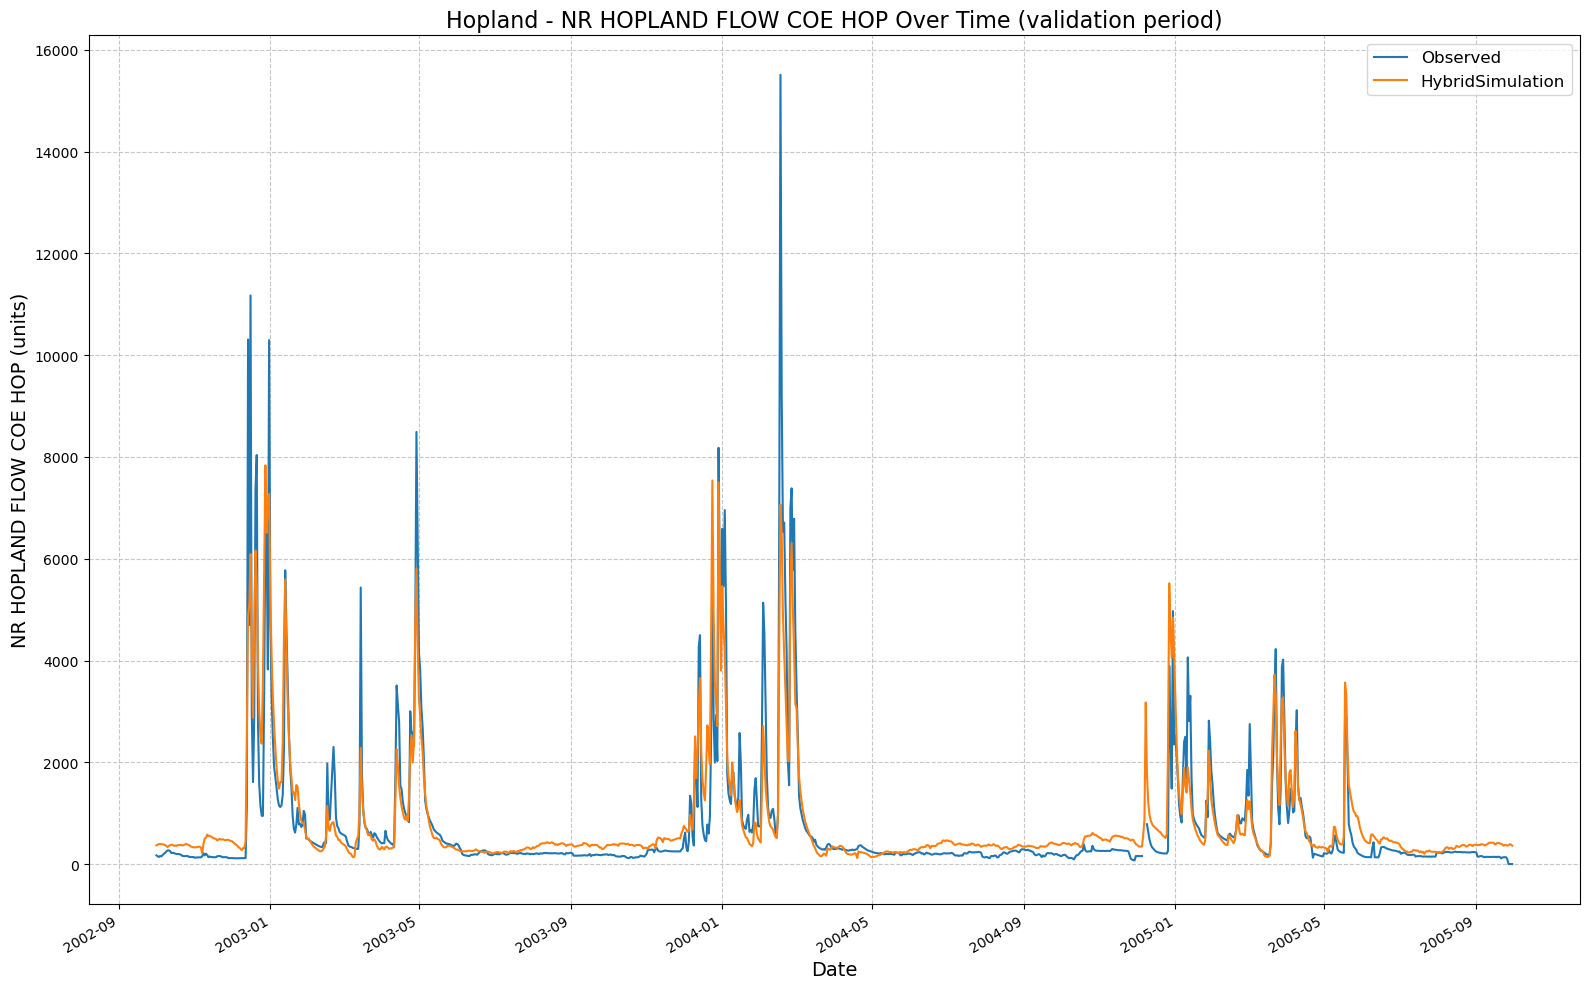

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1601_132351\results_output_validation.csv


({'NSE': 0.8005708903074265,
  'MSE': 383359.34375,
  'RMSE': 619.1601923169803,
  'KGE': 0.7705397371410068,
  'Alpha-NSE': 0.8087715547867136,
  'Beta-KGE': 1.0785666704177856,
  'Beta-NSE': 0.042756119563462244,
  'Pearson-r': 0.9004461338164589,
  'FHV': -22.144782543182373,
  'FMS': -36.62432262576318,
  'FLV': 95.67588710696316,
  'Peak-Timing': 0.2,
  'Peak-MAPE': 31.7566967010498},
 WindowsPath('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/hopland_all/runs/testing_run_1601_132351/results_output_validation.csv'))

In [12]:
lstmPhysicsDaily.results()

## Retrain LSTM on entire train period using best hyperparameters, evaluate on test period

In [14]:
path_to_csv = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/")
path_to_yaml = Path("hopland_gage.yaml")
params = {
    "epochs":16,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
#defaults to daily so no need to specify hourly
lstmNoPhysicsDailyExtended = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, hourly=False, extend_train_period=True)

In [15]:
lstmNoPhysicsDailyExtended.train()

2025-01-16 13:24:01,177: Logging to F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1601_132401\output.log initialized.
2025-01-16 13:24:01,178: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1601_132401
2025-01-16 13:24:01,180: ### Run configurations for testing_run
2025-01-16 13:24:01,182: experiment_name: testing_run
2025-01-16 13:24:01,184: train_basin_file: hopland
2025-01-16 13:24:01,185: validation_basin_file: hopland
2025-01-16 13:24:01,186: test_basin_file: hopland
2025-01-16 13:24:01,188: train_start_date: 1994-10-01 00:00:00
2025-01-16 13:24:01,190: train_end_date: 2005-09-30 00:00:00
2025-01-16 13:24:01,191: validation_start_date: 2002-10-01 00:00:00
2025-01-16 13:24:01,192: validation_end_date: 2005-09-30 00:00:00
2025-01-16 13:24:01,196: test_start_date: 2005-10-01 00:00:00
2025-01-16 13:24:01,197: test_end_date: 2009-09-29 00:00:00
2025-01-16 13:24:01,198: device: cpu
2025-01-16 13:24:01,199: phys

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.mod

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]
2025-01-16 13:24:27,626: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1601_132401\validation\model_epoch016\validation_metrics.csv
2025-01-16 13:24:27,629: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1601_132401\validation\model_epoch016\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/hopland_all/runs/testing_run_1601_132401')

2025-01-16 13:24:27,703: Using the model weights from F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1601_132401\model_epoch016.pt


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.mod

# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]
2025-01-16 13:24:28,118: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1601_132401\test\model_epoch016\test_metrics.csv
2025-01-16 13:24:28,121: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1601_132401\test\model_epoch016\test_results.p
Using basin: Hopland
Using target variable: NR HOPLAND FLOW COE HOP
Observed_key: NR HOPLAND FLOW COE HOP_obs
Simulated_key: NR HOPLAND FLOW COE HOP_sim


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhy

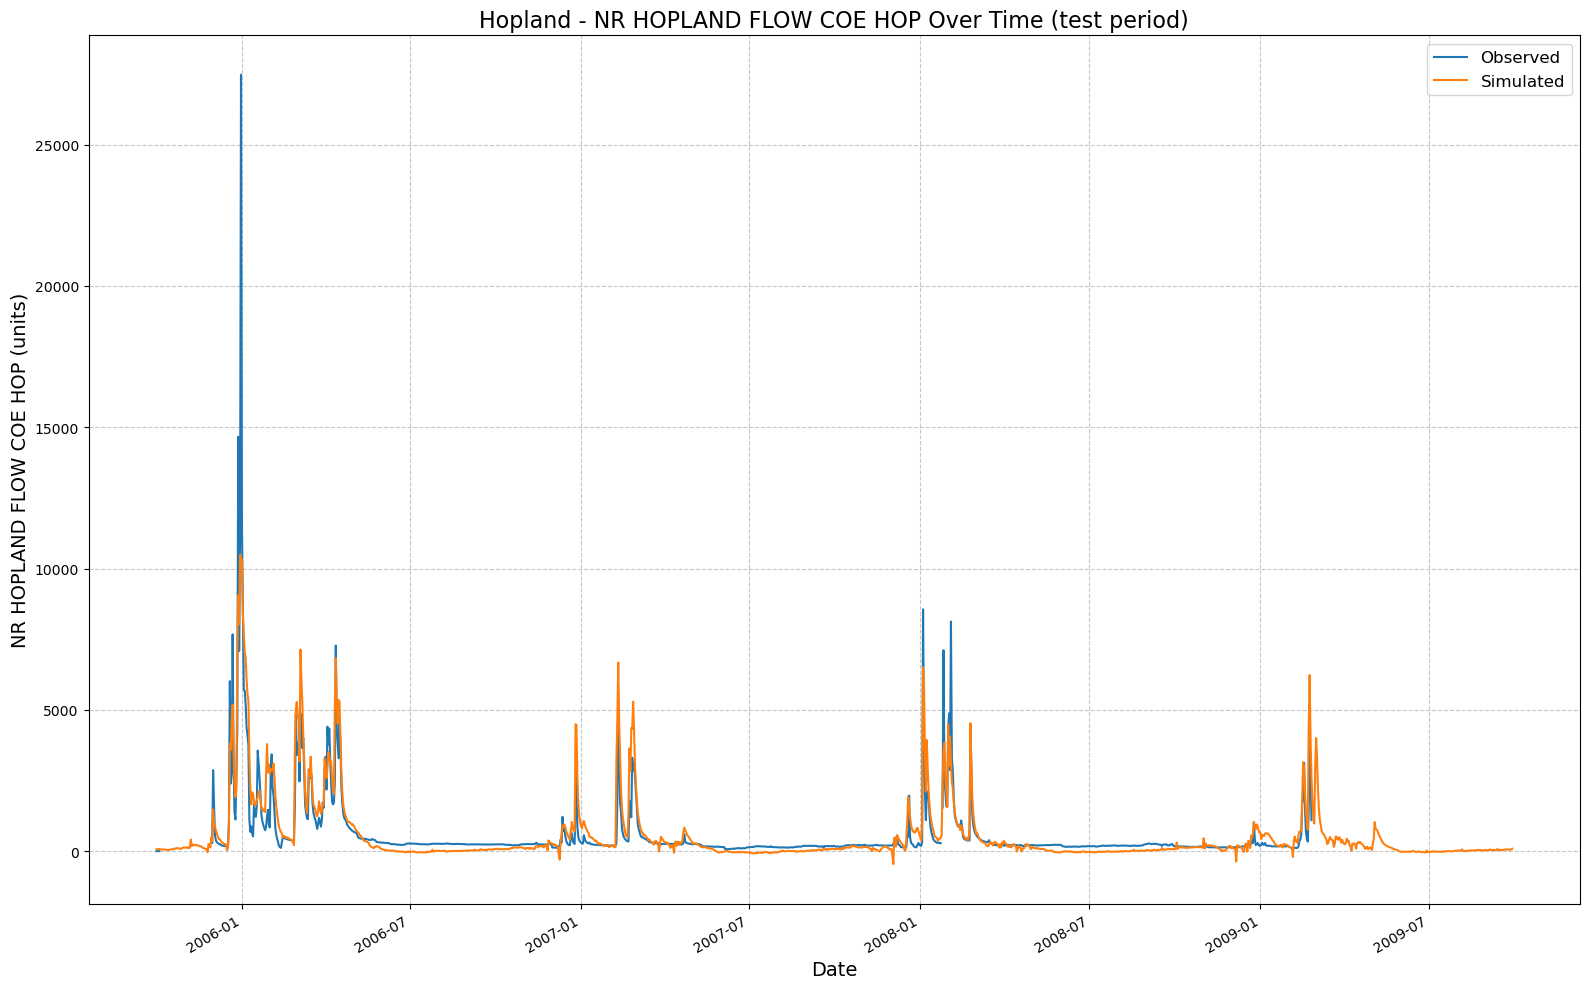

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1601_132401\results_output_test.csv


In [16]:
lstm_result_metrics, lstm_result_path = lstmNoPhysicsDailyExtended.results('test')

In [17]:
lstm_result_metrics

{'NSE': 0.7234275341033936,
 'MSE': 547757.1875,
 'RMSE': 740.1062001496812,
 'KGE': 0.8366840506119313,
 'Alpha-NSE': 0.9401459664072557,
 'Beta-KGE': 1.0455001592636108,
 'Beta-NSE': 0.019604325907215742,
 'Pearson-r': 0.8550195547868924,
 'FHV': -8.251234143972397,
 'FMS': 258.37279800238736,
 'FLV': nan,
 'Peak-Timing': 0.25,
 'Peak-MAPE': 39.25810098648071}

## Retrain PI-LSTM on entire train period using best hyperparameters, evaluate on test period

In [19]:
path_to_csv = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/")
path_to_yaml = Path("hopland_gage.yaml")
path_to_physics_data = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/Hopland_daily.csv")
params = {
    "epochs":16,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
features_with_physics = [
    #from daily.csv
    "RUSSIAN 60 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 60 PRECIP-INC SCREENED",
    "RUSSIAN 70 PRECIP-INC SCREENED",
    "RUSSIAN 70 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "WF RUSSIAN PRECIP-INC SCREENED",
    "WF RUSSIAN ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    #from hopland.csv
    'Hopland Gage FLOW',
    'Russian 60 ET-POTENTIAL',
    'Russian 60 FLOW',
    'Russian 60 FLOW-BASE',
    'Russian 60 INFILTRATION',
    'Russian 60 PERC-SOIL',
    'Russian 60 SATURATION FRACTION',
    'Russian 70 ET-POTENTIAL',
    'Russian 70 FLOW',
    'Russian 70 FLOW-BASE',
    'Russian 70 INFILTRATION',
    'Russian 70 PERC-SOIL',
    'Russian 70 SATURATION FRACTION',
    'WF Russian ET-POTENTIAL',
    'WF Russian FLOW',
    'WF Russian FLOW-BASE',
    'WF Russian INFILTRATION',
    'WF Russian PERC-SOIL',
    'WF Russian SATURATION FRACTION',
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    "UKIAH CA FLOW USGS-MERGED",
    #"Lake Mendocino Storage",    
    ]
#extend train period set to true
lstmPhysicsDailyExtended = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data, hourly=False, extend_train_period=True)

In [20]:
lstmPhysicsDailyExtended.train()

2025-01-16 13:24:28,930: Logging to F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1601_132428\output.log initialized.
2025-01-16 13:24:28,933: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1601_132428
2025-01-16 13:24:28,935: ### Run configurations for testing_run
2025-01-16 13:24:28,937: experiment_name: testing_run
2025-01-16 13:24:28,940: train_basin_file: hopland
2025-01-16 13:24:28,944: validation_basin_file: hopland
2025-01-16 13:24:28,946: test_basin_file: hopland
2025-01-16 13:24:28,949: train_start_date: 1994-10-01 00:00:00
2025-01-16 13:24:28,951: train_end_date: 2005-09-30 00:00:00
2025-01-16 13:24:28,954: validation_start_date: 2002-10-01 00:00:00
2025-01-16 13:24:28,955: validation_end_date: 2005-09-30 00:00:00
2025-01-16 13:24:28,958: test_start_date: 2005-10-01 00:00:00
2025-01-16 13:24:28,959: test_end_date: 2009-09-29 00:00:00
2025-01-16 13:24:28,962: device: cpu
2025-01-16 13:24:28,964: phys

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.mod

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]
2025-01-16 13:24:57,090: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1601_132428\validation\model_epoch016\validation_metrics.csv
2025-01-16 13:24:57,092: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1601_132428\validation\model_epoch016\validation_results.p


WindowsPath('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/hopland_all/runs/testing_run_1601_132428')

2025-01-16 13:24:57,214: Using the model weights from F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1601_132428\model_epoch016.pt


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.mod

# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]
2025-01-16 13:24:57,778: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1601_132428\test\model_epoch016\test_metrics.csv
2025-01-16 13:24:57,780: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1601_132428\test\model_epoch016\test_results.p
Using basin: Hopland
Using target variable: NR HOPLAND FLOW COE HOP
Observed_key: NR HOPLAND FLOW COE HOP_obs
Simulated_key: NR HOPLAND FLOW COE HOP_sim


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhy

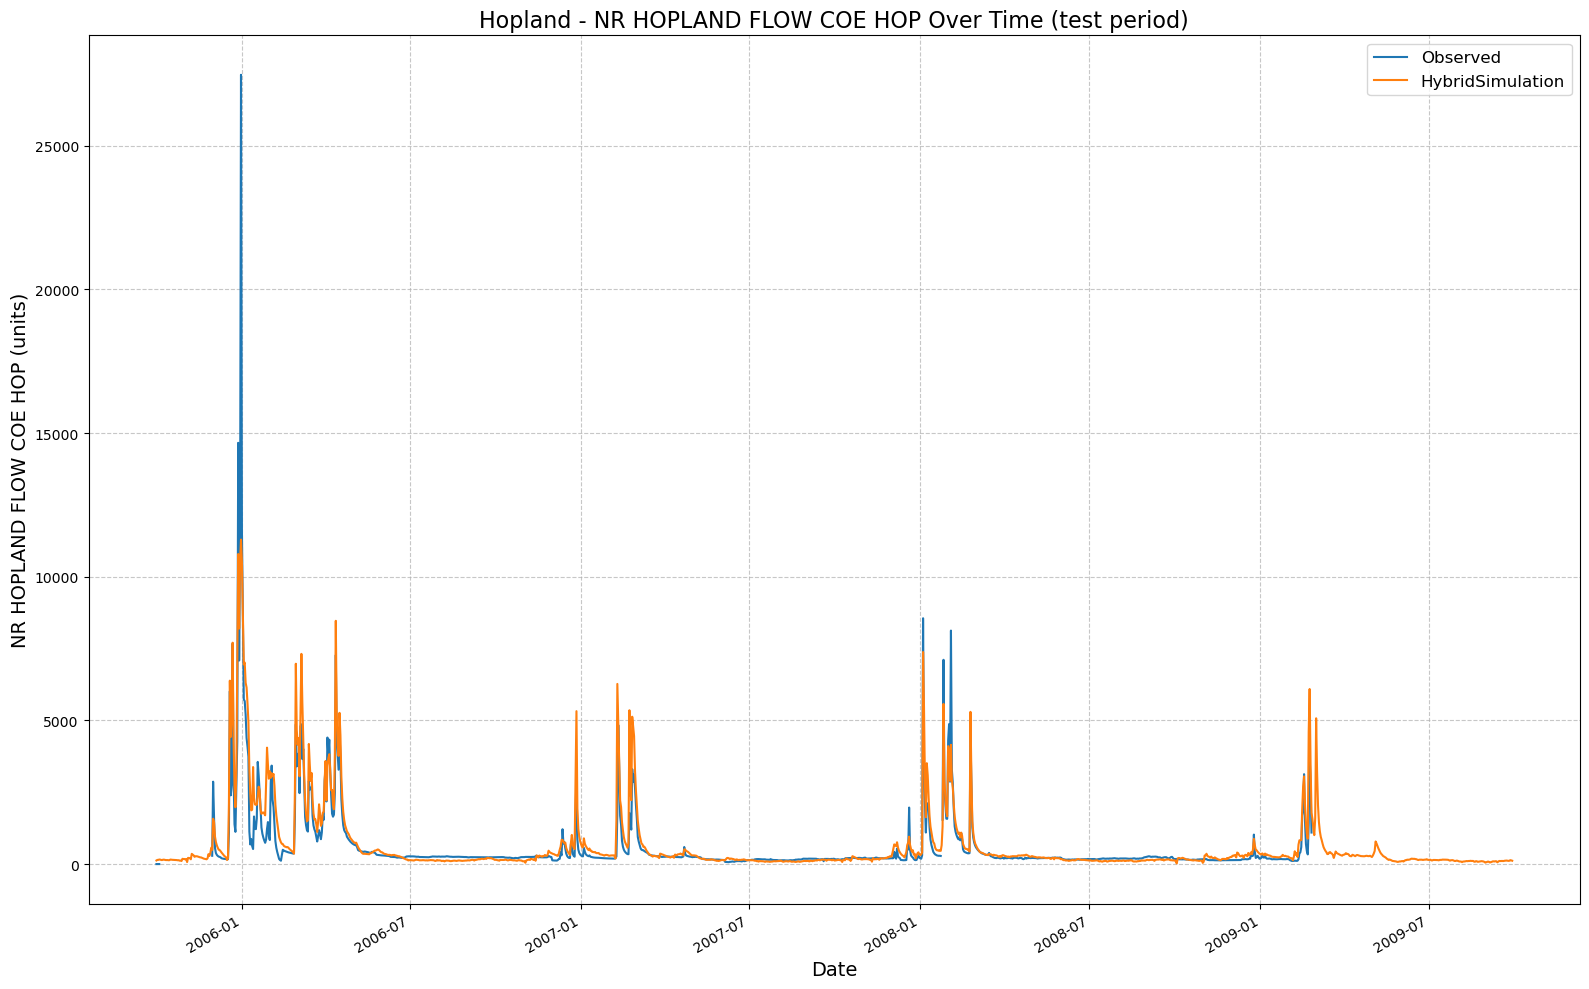

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\runs\testing_run_1601_132428\results_output_test.csv


In [21]:
physics_informed_result_metrics, physics_informed_result_path = lstmPhysicsDailyExtended.results('test')

In [22]:
physics_informed_result_metrics

{'NSE': 0.7740014046430588,
 'MSE': 447594.625,
 'RMSE': 669.0251303202294,
 'KGE': 0.7826947744596907,
 'Alpha-NSE': 0.9549670907684141,
 'Beta-KGE': 1.179348111152649,
 'Beta-NSE': 0.07727445813397545,
 'Pearson-r': 0.8858603786617394,
 'FHV': -3.33130806684494,
 'FMS': 80.85764960521924,
 'FLV': nan,
 'Peak-Timing': 0.25,
 'Peak-MAPE': 30.712227821350098}

## Inspect results

In [24]:
    model1_df = pd.read_csv(lstm_result_path) #colums: Date, Observed, Predicted
    model1_df.head()

,Date,Observed,Predicted
0,2005-10-01,-0.000061,61.24994
1,2005-10-02,-0.000061,66.52667
2,2005-10-03,-0.000061,70.02881
3,2005-10-04,-0.000061,72.09631
4,2005-10-05,NaN,69.11987


In [25]:
    model2_df = pd.read_csv(physics_informed_result_path) #colums: Date, Observed, Predicted
    model1_df.head()

,Date,Observed,Predicted
0,2005-10-01,-0.000061,61.24994
1,2005-10-02,-0.000061,66.52667
2,2005-10-03,-0.000061,70.02881
3,2005-10-04,-0.000061,72.09631
4,2005-10-05,NaN,69.11987


In [26]:
    hms_df = clean_daily(pd.read_csv(path_to_physics_data))
    hms_df.head()

,Day,Time,Hopland Gage FLOW,Russian 60 ET-POTENTIAL,Russian 60 FLOW,Russian 60 FLOW-BASE,Russian 60 INFILTRATION,Russian 60 PERC-SOIL,Russian 60 SATURATION FRACTION,Russian 70 ET-POTENTIAL,...,Russian 70 FLOW-BASE,Russian 70 INFILTRATION,Russian 70 PERC-SOIL,Russian 70 SATURATION FRACTION,WF Russian ET-POTENTIAL,WF Russian FLOW,WF Russian FLOW-BASE,WF Russian INFILTRATION,WF Russian PERC-SOIL,WF Russian SATURATION FRACTION
date,,,,,,,,,,,,,,,,,,,,,
1994-10-01,1-Oct-94,00:00:00,153,0.0331,0,0,0,0,0,0.0331,...,0,0,0,0,0.0283,0,0,0,0,0
1994-10-02,2-Oct-94,00:00:00,153,0.0554,0,0,0,0,0,0.0554,...,0,0,0,0,0.0475,0,0,0,0,0
1994-10-03,3-Oct-94,00:00:00,153,0.0487,0,0,0,0,0,0.0487,...,0,0,0,0,0.0417,0,0,0,0,0
1994-10-04,4-Oct-94,00:00:00,147.1886,0.0131,0.2729,0,0.1088,0,0.006,0.013,...,0,0.0163,0,0.0008,0.0112,0,0,0,0,0
1994-10-05,5-Oct-94,00:00:00,133.9202,0.0267,0.3386,0,0,0,0.0155,0.0267,...,0,0,0,0.0023,0.0229,0,0,0,0,0


 ## Plot combined results

           date  Observed_Model1  Predicted_Model1  Observed_Model2  \
4018 2005-10-01        -0.000061          61.24994        -0.000061   
4019 2005-10-02        -0.000061          66.52667        -0.000061   
4020 2005-10-03        -0.000061          70.02881        -0.000061   
4021 2005-10-04        -0.000061          72.09631        -0.000061   
4022 2005-10-05              NaN          69.11987              NaN   

      Predicted_Model2  HMS_predicted  
4018         125.39264       224.0293  
4019         144.74963       226.3797  
4020         145.82874       226.5107  
4021         157.75446       226.1423  
4022         155.01746       226.7505  


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\hopland_all\..\..\..\UCB-USACE-LSTMs\neuralhy

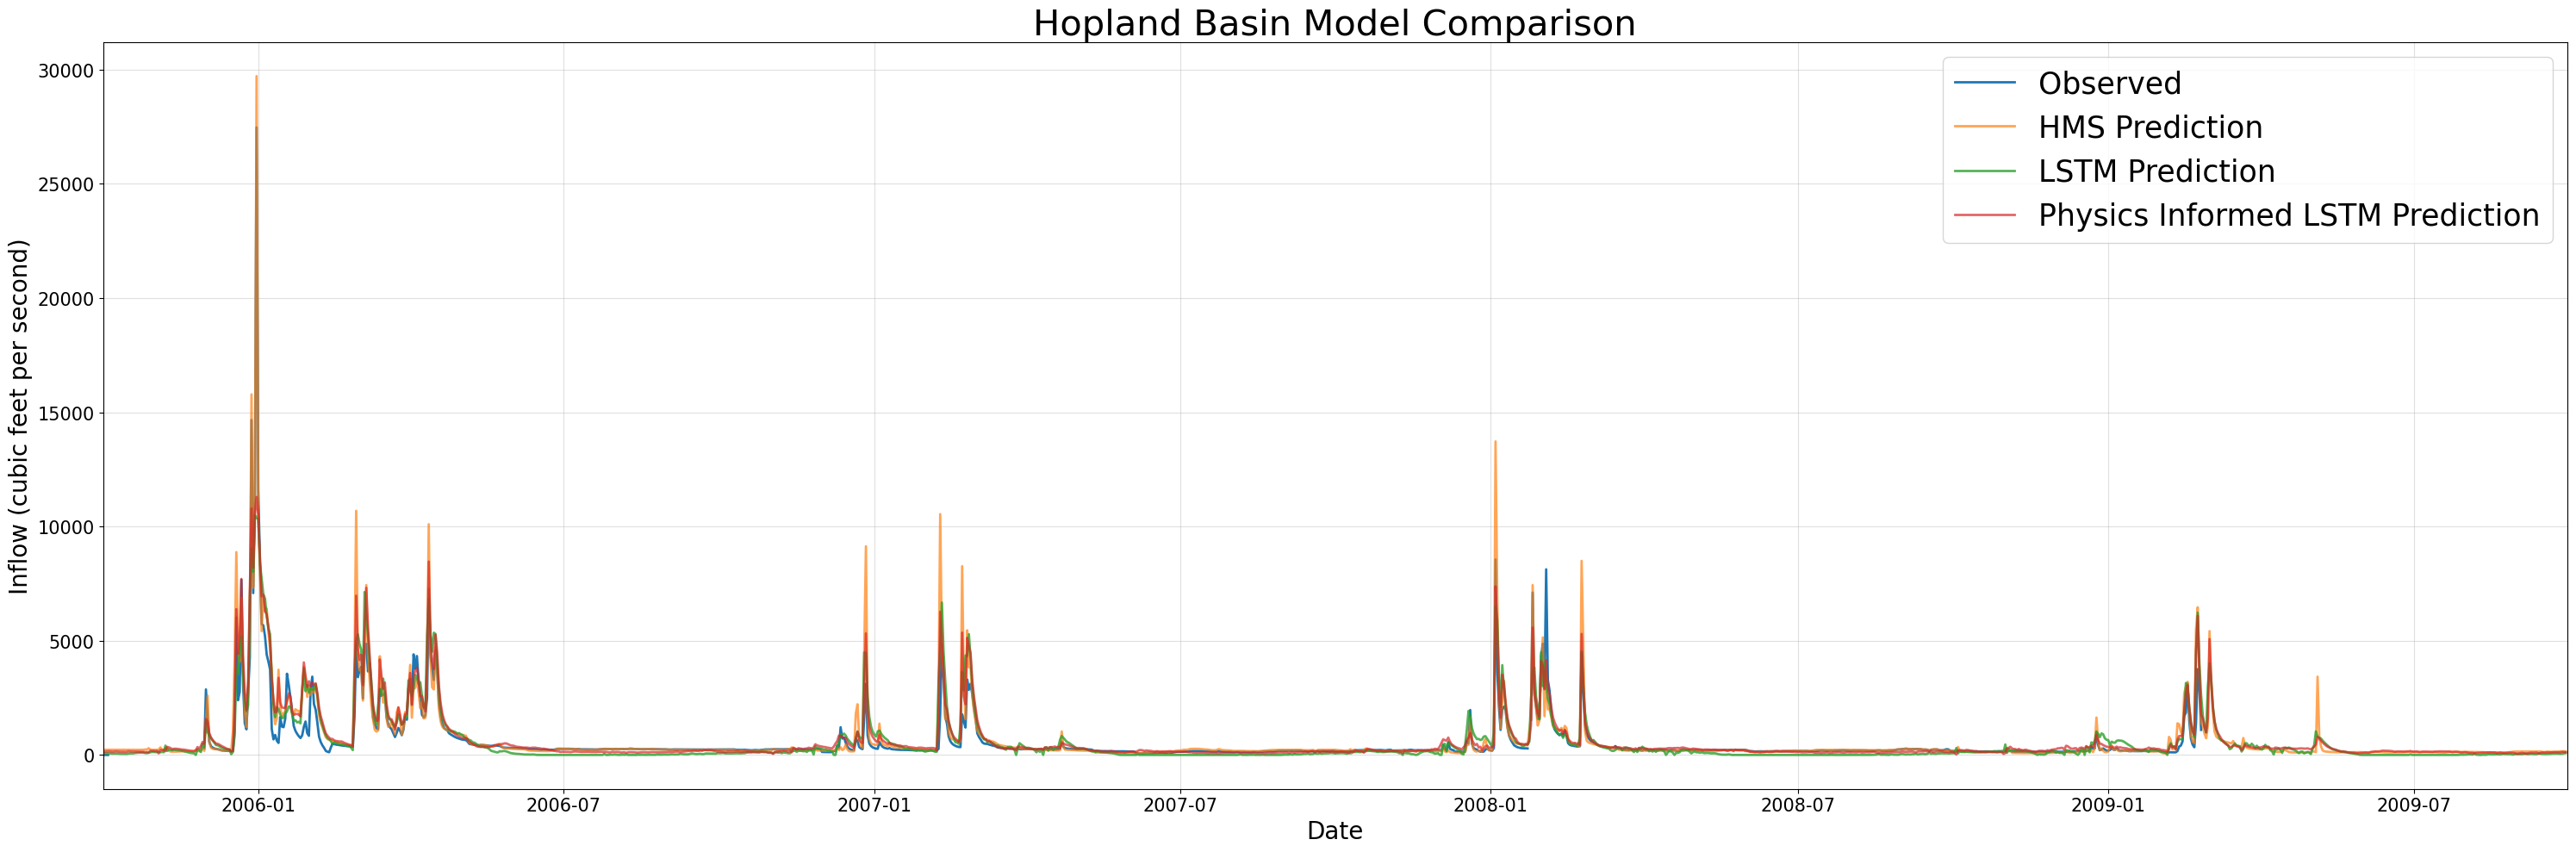

In [28]:
myplot, metrics_df = combinedPlot(lstm_results=lstm_result_path, lstmPhysics_results= physics_informed_result_path, HMS_results=path_to_physics_data, title='Hopland Basin Model Comparison', fName = "hopland_metrics.csv")

In [29]:
metrics_df

,HMS,LSTM,Physics_Informed_LSTM
NSE,0.795537,0.724928,0.774001
MSE,404943.196088,544785.072980,447594.665134
RMSE,636.351472,738.095572,669.025160
KGE,0.728365,0.832982,0.782695
Alpha-NSE,1.186275,0.937684,0.954968
Beta-KGE,1.185323,1.056502,1.179348
Beta-NSE,0.079849,0.024344,0.077274
Pearson-r,0.931134,0.855711,0.885860
FHV,23.945896,-8.251235,-3.331308
FMS,32.032020,258.372824,80.857700
